This is the third visualization, It display the relationship between studio and market share <br>
For user-friendly, only display the top 20 studio between 2010 to 2020

import every package that we used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import data that we will use and check

In [2]:
df_gross = pd.read_csv('df_gross.zip')
df_gross

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014,32,"Nov 5, 2014",Interstellar,165000000,188017894,666379375
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012,69,"Dec 25, 2012",Django Unchained,100000000,162805434,449948323
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013,76,"Dec 25, 2013",The Wolf of Wall Street,100000000,116900694,389870414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,tt4360484,The Joneses,The Joneses,2016,80.0,"Biography,Documentary",tt4360484,5.9,15,The Joneses,RAtt.,1500000.0,2010,88,"Apr 16, 2010",The Joneses,10000000,1475746,3541565
1374,tt1833881,Chloe,The 10 Commandments of Chloe,2013,73.0,"Drama,Music,Romance",tt1833881,6.9,34,Chloe,SPC,3100000.0,2010,97,"Mar 26, 2010",Chloe,13000000,3075255,11831131
1375,tt8851190,Red,Red,2018,90.0,Drama,tt8851190,8.1,26,Red,Sum.,90400000.0,2010,63,"Oct 15, 2010",Red,60000000,90380162,196439693
1376,tt4170206,Red,Red,2014,107.0,Drama,tt4170206,8.4,8,Red,Sum.,90400000.0,2010,63,"Oct 15, 2010",Red,60000000,90380162,196439693


In [3]:
df_gross['studio'] = df_gross['studio'].replace(['WB (NL)'], 'WB')
df_gross['studio'].value_counts().head(20)

WB       157
Uni.     146
Fox      124
Par.      82
BV        78
Sony      75
LGF       64
FoxS      60
Focus     48
Wein.     46
IFC       31
RAtt.     31
Rela.     30
ORF       30
LG/S      29
SPC       29
SGem      26
A24       21
Magn.     20
TriS      18
Name: studio, dtype: int64

group the data by studio in descending order

In [4]:
series_tmp = df_gross.groupby('studio')['domestic_gross_y'].sum().sort_values(ascending = False)
series_tmp

studio
BV      14993207462
WB      14248977437
Uni.    12807747903
Fox     10419424269
Sony     6978740466
           ...     
FCW           17484
Alc           17472
P4             9120
BBC               0
KE                0
Name: domestic_gross_y, Length: 88, dtype: int64

find the total domestic market by taking sum of domestic gross

In [5]:
total_domestic_market = df_gross['domestic_gross_y'].sum()
total_domestic_market

83438773511

find the market share by deviding each domestic by total domestic, and round by 3

In [6]:
marketshare = round(series_tmp/total_domestic_market,3)
print(marketshare.head(20))
print(marketshare.head(20).sum())

# 97% of the market is owned by the top 20 studios

studio
BV       0.180
WB       0.171
Uni.     0.153
Fox      0.125
Sony     0.084
Par.     0.076
LGF      0.040
P/DW     0.020
Wein.    0.016
LG/S     0.016
SGem     0.013
Focus    0.013
FoxS     0.013
Rela.    0.011
TriS     0.010
Sum.     0.009
STX      0.008
ORF      0.008
CBS      0.003
A24      0.003
Name: domestic_gross_y, dtype: float64
0.9720000000000001


In [7]:
series_tmp = round(series_tmp/total_domestic_market,3)
series_tmp = series_tmp*100
series_tmp

studio
BV      18.0
WB      17.1
Uni.    15.3
Fox     12.5
Sony     8.4
        ... 
FCW      0.0
Alc      0.0
P4       0.0
BBC      0.0
KE       0.0
Name: domestic_gross_y, Length: 88, dtype: float64

the top 20 studio has 97.2 percent of entire market share

display the percent market share

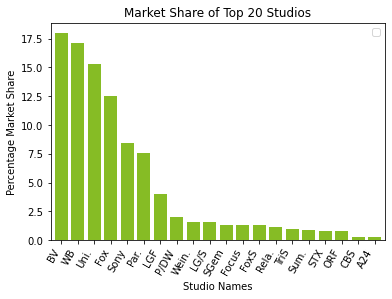

In [9]:
# create dataframe of top 20 and draw plot diagram
df_graph = pd.DataFrame(series_tmp)
df_graph[:20].plot.bar(color = '#86BC25', width=0.8)

plt.xticks(rotation=60, ha='right')

plt.title('Market Share of Top 20 Studios')
plt.xlabel('Studio Names')
plt.ylabel('Percentage Market Share')
plt.legend('')

plt.show()

From the result, notes that BV is part of Disney, WB is Warners Brothers, Uni is Universial Studio, Par. is Paramount Pictures.